In [1]:
# THIS DOCUMENT CONSIST OF 
'''
1) MODEL EVALUATION 
2) OVER-FITTING, UNDER-FITTING AND MODEL SELECTION 
3) RIDGE REGRESSION
4) GRID SEARCH
'''



'\n1) MODEL EVALUATION \n2) OVER-FITTING, UNDER-FITTING AND MODEL SELECTION \n3) RIDGE REGRESSION\n4) GRID SEARCH\n'

In [4]:
# installing all the required libraries 

! pip install pandas
! pip install numpy 
! pip install seaborn 
! pip install matplotlib 
! pip install scikit-learn 
! pip install scipy 



In [6]:
# importing all the libraries and methods that are required 

import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline 


In [7]:
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv'
df = pd.read_csv(filepath, header=0)
df.head()

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,3,2,164,audi,std,four,sedan,fwd,front,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,4,2,164,audi,std,four,sedan,4wd,front,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [8]:
df=df._get_numeric_data()
df.head()

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [9]:
# lets remove un-named columns

df.drop(["Unnamed: 0.1", "Unnamed: 0"], axis = 1, inplace = True)
df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,1,122,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,2,164,99.8,0.848630,0.919444,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,2,164,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [10]:
 # LIBRARIES FOR PLOTTING 

! pip install micropip
import micropip
await micropip.install(['ipywidgets'], keep_going=True)
import ipywidgets
from ipywidgets import interact, interactive, fixed, interact_manual


In [11]:
# FUNCTIONS FOR PLOTTING 


def distributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize = (width, height))

    ax1 = sns.distplot(RedFunction, hist = False, color ="r", label = RedName)
    ax2 = sns.distplot(BlueFunction, hist  = False, color = "b", label = BlueName)


    plt.xlabel("Price (in $)")
    plt.ylabel(" Properties of cars")
    plt.title(Title)
    plt.show()
    plt.close()
    
    
    


In [12]:
def pollyplot( x_train, x_test, y_train, y_test, lr, poly_transform):
    width = 12
    height = 10
    plt.figure(figsize= (width, height))

    xmax = max([x_train.values.max(), x_test.values.max()])

    xmin = min([x_train.values.min(),  x_test.values.min()])

    x =np.arange(xmin, xmax , 0.1) # 0.1 value is the step size used to generate an array of evenly spaced numbers between the minimum and maximum x values. This array is then used to plot the predicted function.

    plt.plot(x_train, y_train, "ro", label = "Training Data set")
    plt.plot(x_test, y_test, "go", label = "Testing Data set")
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1,1))), label = "Predicted Finction")
    plt.ylim([-10000, 60000])
    plt.ylabel("Price")
    plt.legend()
    plt.show()
    

In [13]:
# PART 1 ---> Training & Testing

'''
An important step in testing your model is to split your data into training and testing data. 
We will place the target data price in a separate dataframe y_data:
'''

y_data = df["price"]

'''  Drop price data in dataframe x_data: '''

x_data = df.drop('price', axis = 1)

In [14]:
# Randomly split of trainig and testing data 

'''Now, we randomly split our data into training and testing data using the function train_test_split.'''

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.1, random_state = 1)   # random_state=1 makes the data splitting deterministic. If you run the code multiple times with random_state=1, you'll always get the same training and testing set

print("number of test samples:", x_test.shape[0])
print("number of training samples:", x_train.shape[0])



number of test samples: 21
number of training samples: 180


In [15]:
# question 1 

'''
Use the function "train_test_split" to split up the dataset such that 40% of the data samples will be 
utilized for testing. Set the parameter "random_state" equal to zero. The output of the function should 
be the following: "x_train1" , "x_test1", "y_train1" and "y_test1".
'''

x1_train, x1_test, y1_train, y1_test = train_test_split(x_data, y_data, test_size = 0.4, random_state = 0)
print("training data set count:", x1_train.shape[0])
print("Testing data set count:", x1_test.shape[0])

training data set count: 120
Testing data set count: 81


In [16]:
# Linear Regression 

lm = LinearRegression()

#We fit the model using the feature "horsepower":

lm.fit(x_train[["horsepower"]], y_train)

# lets calculate R-Square for both Training data set and Testing data set 

R_square_Train = lm.score(x_train[["horsepower"]], y_train)
print("R_square value Train :", R_square_Train)

R_square_Test = lm.score(x_test[["horsepower"]], y_test)
print("R_squared value Test:", R_square_Test)


R_square value Train : 0.6619724197515104
R_squared value Test: 0.36358755750788263


In [17]:
# Question 2

'''
Find the R^2 on the test data using 40% of the dataset for testing.
'''

lm.fit(x1_train[["horsepower"]], y1_train)

# R_squared_train 

R_squared_train = lm.score(x1_train[["horsepower"]], y1_train)
print("R_squared_train:", R_squared_train)

R_squared_test = lm.score(x1_test[["horsepower"]], y1_test)
print("R_squared_test:", R_squared_test)

R_squared_train: 0.5754067463583004
R_squared_test: 0.7139364665406973


In [18]:
# Cross-Validation Score
''' Let's import cross_val_score from the module model_selection

We input the object, the feature ("horsepower"), and the target data (y_data). 
The parameter 'cv' determines the number of folds. In this case, it is 4.
'''
cross_val = cross_val_score(lm, x_data[["horsepower"]], y_data, cv =4)

# The default scoring is R^2. Each element in the array has the average R^2 value for the fold:

print("cross_val:", cross_val)


# The default scoring is R^2. Each element in the array has the average R^2 value for the fold:

print("Mean of cross_val is :", cross_val.mean(),"and", "standard Deviation of cross_val is:", cross_val.std())

cross_val: [0.7746232  0.51716687 0.74785353 0.04839605]
Mean of cross_val is : 0.522009915042119 and standard Deviation of cross_val is: 0.291183944475603


In [19]:
# Cross_Valdiation_Prediction 
'''
What if we want a little more information? 


What if we want to know the actual predicted values supplied by our model before the R^2 values are 
calculated? To do this, we use the cross_val_predict function. The input parameters are exactly the 
same as the cross_val_score function, but the output is a prediction.

'''





'''
You can also use the function 'cross_val_predict' to predict the output. 
The function splits up the data into the specified number of folds, with 
one fold for testing and the other folds are used for training. 
'''

yhat = cross_val_predict(lm, x_data[["horsepower"]], y_data, cv = 4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

In [21]:
# PART 2 ---> Overfitting, Underfitting and Model Selection


'''
It turns out that the test data, sometimes referred to as the "out of sample data", 
is a much better measure of how well your model performs in the real world. 
One reason for this is overfitting.

Let's go over some examples. It turns out these differences are more apparent in Multiple Linear Regression 
and Polynomial Regression so we will explore overfitting in that context.
'''

# Let's create Multiple Linear Regression objects and train the model using 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg' as features.

lm = LinearRegression()
lm.fit(x_train[['horsepower', 'curb-weight', 'engine-size' , 'highway-mpg']], y_train)

#prediction using training  data set

yhat_train = lm.predict(x_train[['horsepower', 'curb-weight', 'engine-size' , 'highway-mpg']])
print("yhat_train values are:", yhat_train[0:5])


#prediction using Testing Data Set

yhat_test = lm.predict(x_test[['horsepower', 'curb-weight', 'engine-size' , 'highway-mpg']])
print("yhat_test values are:", yhat_test[0:5])

yhat_train values are: [ 7426.6731551  28323.75090803 14213.38819709  4052.34146983
 34500.19124244]
yhat_test values are: [11349.35089149  5884.11059106 11208.6928275   6641.07786278
 15565.79920282]


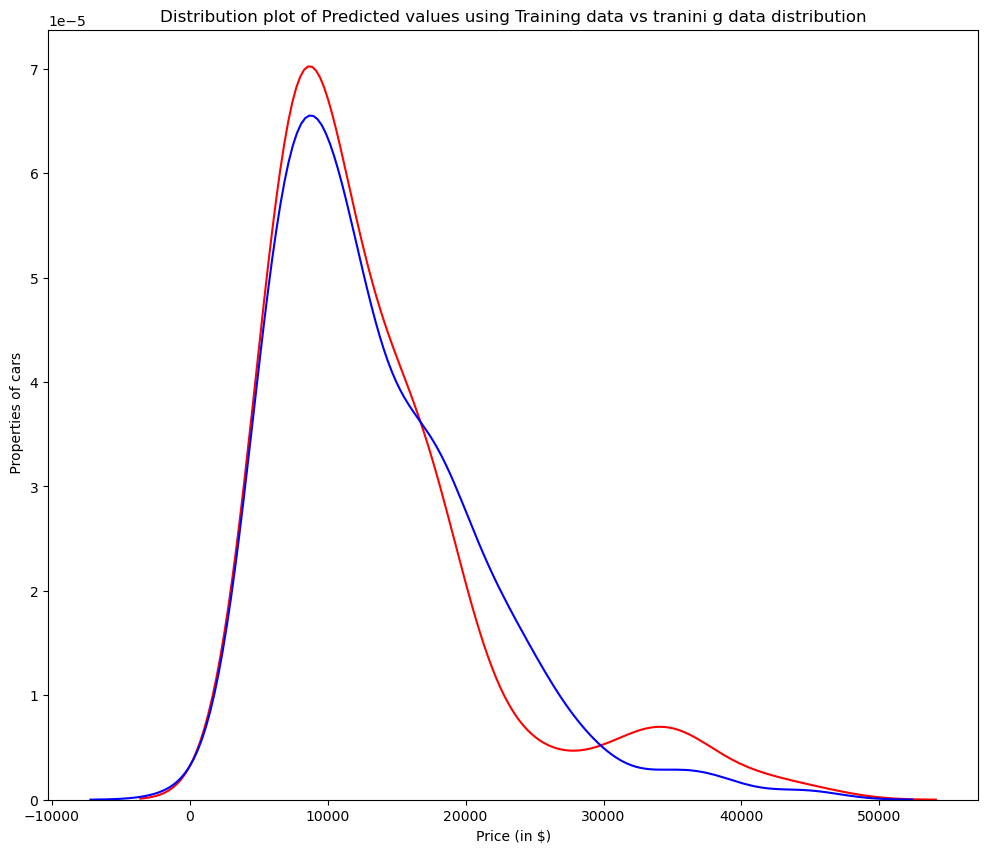

In [22]:
# Let's perform some model evaluation using our training and testing data separately. 
Title = "Distribution plot of Predicted values using Training data vs tranini g data distribution"
distributionPlot(y_train, yhat_train, "Actual Values (Training data)", "Predicted Values (Training data)", Title)

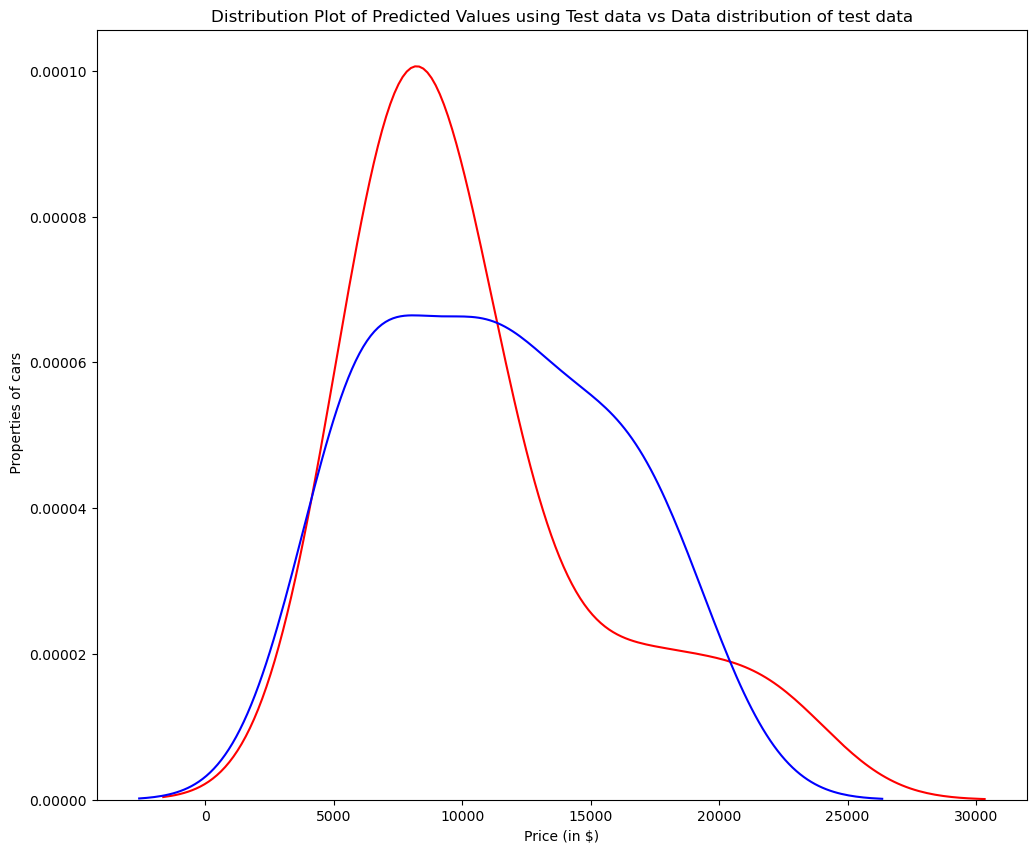

In [23]:
'''
So far, the model seems to be doing well in learning from the training dataset. 
But what happens when the model encounters new data from the testing dataset? 
When the model generates new values from the test data, we see the distribution 
of the predicted values is much different from the actual target values.
'''

Title = "Distribution Plot of Predicted Values using Test data vs Data distribution of test data"

distributionPlot(y_test, yhat_test, "Actual Values (Test)", "Predicted Values (Test)", Title)

In [24]:
'''
Comparing Figure 1 and Figure 2, it is evident that the distribution of the test data in 
Figure 1 is much better at fitting the data. This difference in Figure 2 is apparent in the range of 
5000 to 15,000. This is where the shape of the distribution is extremely different. 
Let's see if polynomial regression also exhibits a drop in the prediction accuracy when analysing the 
test dataset.
'''


#  OVERFITTING 


'''

Overfitting occurs when the model fits the noise, but not the underlying process. 
Therefore, when testing your model using the test set, your model does not perform as 
well since it is modelling noise, not the underlying process that generated the relationship. 
Let's create a degree 5 polynomial model.


Let's use 55 percent of the data for training and the rest for testing:

'''

x_train, x_test, y_train,  y_test = train_test_split(x_data, y_data, test_size = 0.45, random_state = 0)

# We will perform a degree 5 polynomial transformation on the feature 'horsepower'.
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])


# Now, let's create a Linear Regression model "poly" and train it.

poly = LinearRegression()

poly.fit(x_train_pr, y_train)

# We can see the output of our model using the method "predict." We assign the values to "yhat".

yhat = poly.predict(x_test_pr)
yhat[0:5]


print("Predicted values:", yhat[0:5])

print("True values:", y_test[0:5].values)


Predicted values: [ 6728.6556227   7307.98782694 12213.78771225 18893.24803311
 19995.95194307]
True values: [ 6295. 10698. 13860. 13499. 15750.]


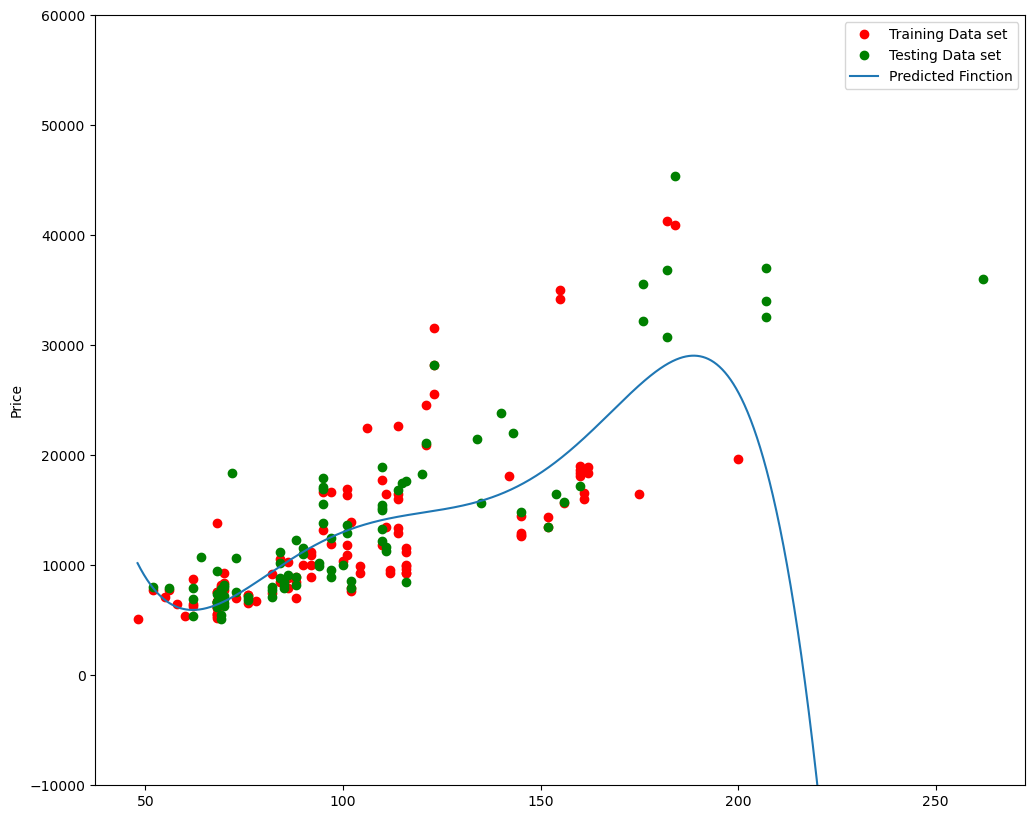

In [25]:
'''
We will use the function "PollyPlot" that we defined at the beginning of the lab to display the training data, 
testing data, and the predicted function.

'''

pollyplot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, poly, pr)

In [26]:
'''
Figure 3: A polynomial regression model where red dots represent training data, green dots represent test 
data, and the blue line represents the model prediction.

We see that the estimated function appears to track the data but around 200 horsepower, the function begins 
to diverge from the data points.
'''

# R_squared value for training data:


print("R_squared value for training data:", poly.score(x_train_pr, y_train))

# R_squared value for testing data

print("R_squared value for testing data:", poly.score(x_test_pr, y_test))


R_squared value for training data: 0.5567716902120512
R_squared value for testing data: -29.87134031559649


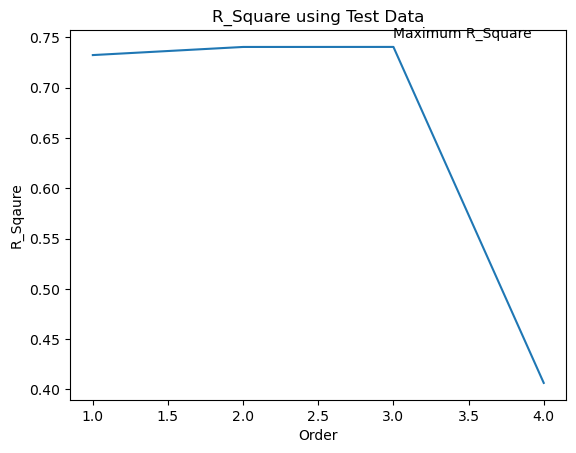

In [27]:
'''
We see the R^2 for the training data is 0.5567 while the R^2 on the test data was -29.87. 
The lower the R^2, the worse the model. A negative R^2 is a sign of overfitting.

Let's see how the R^2 changes on the test data for different order polynomials and then plot the results:
'''

R_sq_test = []
order = [1,2,3,4]
for i in order:
    pr = PolynomialFeatures(degree = i)

    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])

    lr = LinearRegression()

    lr.fit(x_train_pr, y_train)
    R_sq_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, R_sq_test)
plt.xlabel("Order")
plt.ylabel("R_Sqaure")
plt.title("R_Square using Test Data")
plt.text(3, 0.75,"Maximum R_Square")
plt.show()

In [28]:
import micropip
await micropip.install(['ipywidgets'], keep_going=True)
import ipywidgets
from ipywidgets import interact

def f(order, test_data):
    x_train, y_train, x_test, y_test = train_test_split(x_data, y_data, test_size = test_data, random_state = 0)
    pr = PolynomialFeatures(degree = order)
    x_train_pr = pr.fit_transform(x_train['horsepower'])
    x_test_pr = pr.fit_transform(x_test['horsepower'])
    poly = LinearRegression()
    poly.fit(x_train_pr, y_train)
    pollyplot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, poly, pr)



In [29]:
interact(f, order =(0,6,1), test_data = (0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

(110, 15)
(91, 15)


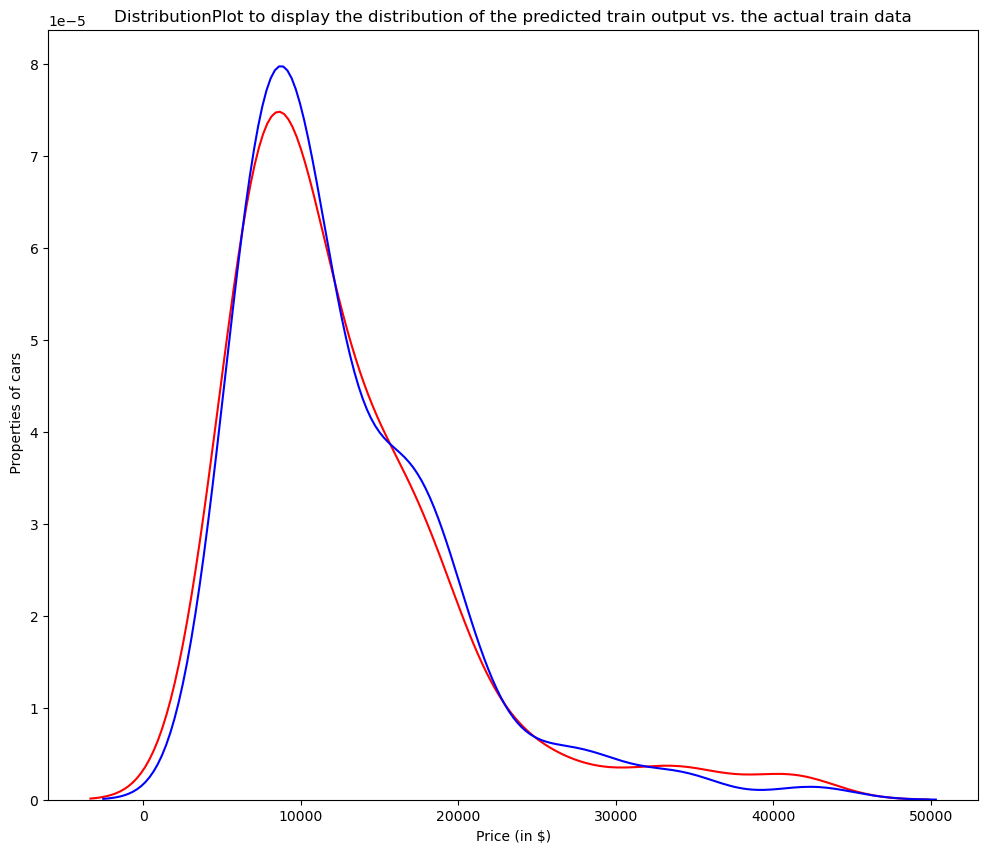

In [30]:
# QUESTION 4A

''' We can perform polynomial transformations with more than one feature. 
Create a "PolynomialFeatures" object "pr1" of degree two.'''

pr1 = PolynomialFeatures( degree = 2)
pr1


# QUESTION 4B

'''
Transform the training and testing samples for the features 
'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg'. 
'''

x_train_pr1= pr1.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size' , 'highway-mpg']])
x_test_pr1= pr1.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size' , 'highway-mpg']])

# QUESTION 4C

''' How many dimensions does the new feature have? '''

print(x_train_pr1.shape)
print(x_test_pr1.shape)


#QUESTION 4D

''' 
Create a linear regression model "poly1". 
Train the object using the method "fit" using the polynomial features.
'''
poly1 = LinearRegression()
poly1.fit(x_train_pr1, y_train)

# QUESTION 4E

'''
Use the method "predict" to predict an output on the polynomial features, 
then use the function "DistributionPlot" to display the distribution of the predicted test output vs. 
the actual test data.
'''
yhat_pr1 = poly1.predict(x_train_pr1)
yhat_pr1[0:5]
Title = "DistributionPlot to display the distribution of the predicted train output vs. the actual train data"
distributionPlot(y_train, yhat_pr1, "actual train data", "predicted train output", Title)

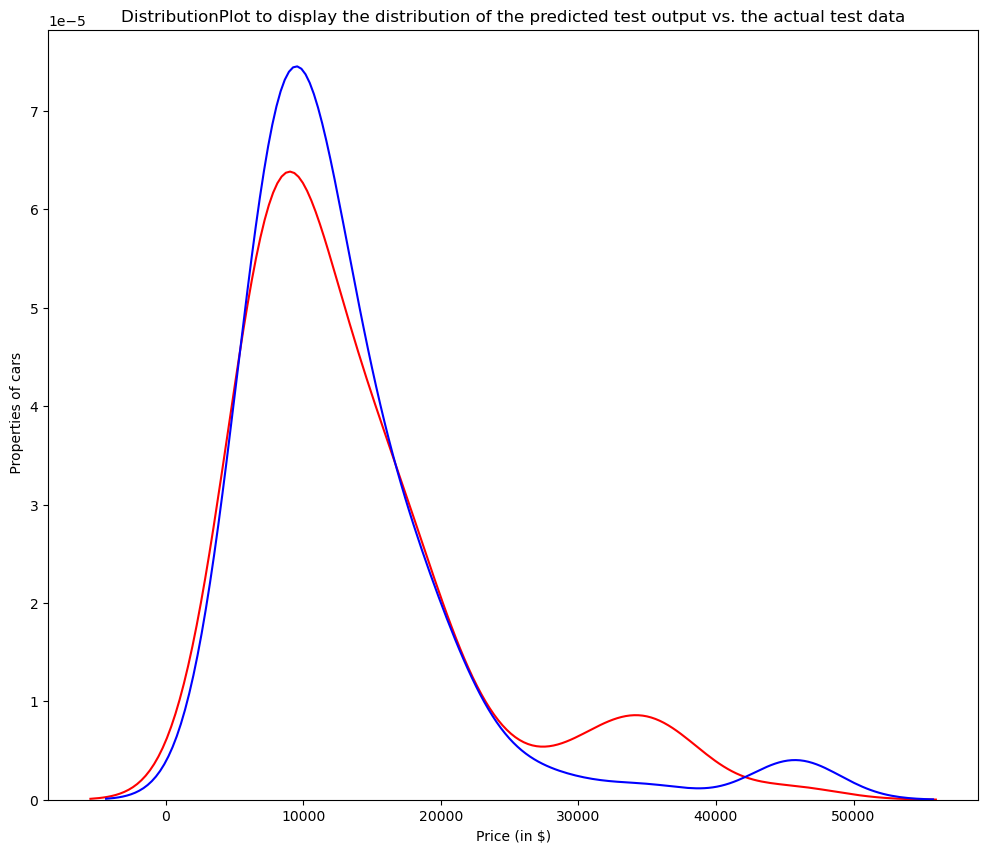

In [31]:
yhat_test_pr1 = poly1.predict(x_test_pr1)
yhat_test_pr1[0:5]
Title = "DistributionPlot to display the distribution of the predicted test output vs. the actual test data"
distributionPlot(y_test, yhat_test_pr1, "actual test data", "predicted test output", Title)

In [32]:
# Ridge Regression 

'''
In this section, we will review Ridge Regression and see how the parameter alpha changes the model. 
Just a note, here our test data will be used as validation data.
'''

#Let's perform a degree two polynomial transformation on our data.

pr = PolynomialFeatures(degree = 2)
x_train_pr = pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr = pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])


from sklearn.linear_model import Ridge

# Let's create a Ridge regression object, setting the regularization parameter (alpha) to 0.1

rm = Ridge(alpha = 1)

rm.fit(x_train_pr, y_train)

yhat_rm = rm.predict(x_test_pr)
print("Predicted test values:", yhat_rm[0:5])
print("Actual test values:", y_test[0:5].values)

Predicted test values: [ 6570.82441941  9636.2489147  20949.92322737 19403.60313256
 21397.69847683]
Actual test values: [ 6295. 10698. 13860. 13499. 15750.]


In [81]:
'''
We select the value of alpha that minimizes the test error. 
To do so, we can use a for loop. We have also created a progress bar to see how many iterations 
we have completed so far
'''

from tqdm import tqdm 

r_sq_test = []
r_sq_train = []

Alpha = 10 * np.array(range(0, 1000)) # creating an array of numbers, starting from 0, incrementing by 10, and going up to 99990.
pbar = tqdm(Alpha)

for alpha in pbar: # for each alpha value in Alpha 
    rm = Ridge(alpha = alpha)
    rm.fit(x_train_pr, y_train)
    test_score = rm.score(x_test_pr, y_test)
    train_score = rm.score(x_train_pr, y_train)

    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    r_sq_test.append(test_score)
    r_sq_train.append(train_score)

100%|█| 1000/1000 [00:05<00:00, 172.69it/s, Test Score=0.564, Train Score=0.859]


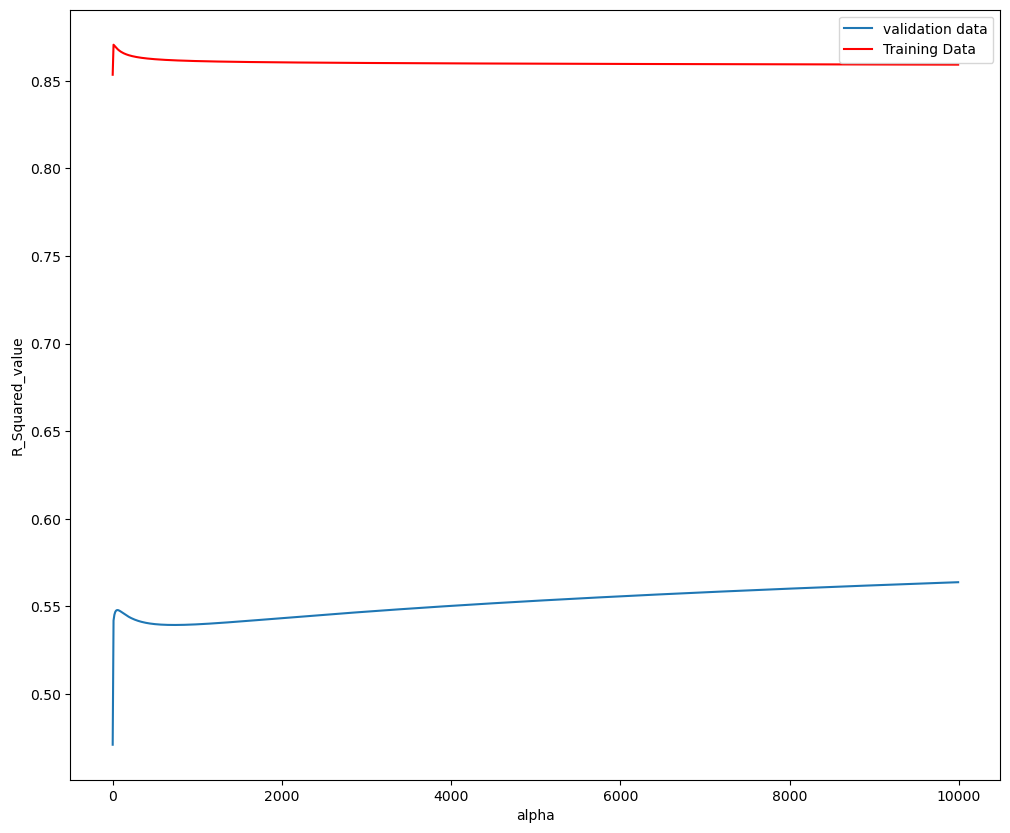

In [82]:
# We can plot out the value of R^2 for different alphas:

width = 12
height = 10
plt.figure(figsize = (width, height))

plt.plot(Alpha, r_sq_test, label = "validation data")
plt.plot(Alpha, r_sq_train, color = "r", label = "Training Data")
plt.xlabel("alpha")
plt.ylabel("R_Squared_value")
plt.legend()
plt.show()

In [97]:
# part 4   Grid Search 

'''
The term alpha is a hyperparameter. 
Sklearn has the class GridSearchCV to make the process of finding the best hyperparameter simpler.
'''

from sklearn.model_selection import GridSearchCV


# create a dictionary of parameter values 

parameters = [{"alpha":[0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]}]
print("Parameter values:", parameters)

# create ridge regression object 
rr = Ridge()

# Create gridSearch object 

grid = GridSearchCV(rr, parameters, cv =4)

# fit the model

grid.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

Parameter values: [{'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]}]


GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000,
                                    100000, 1000000]}])

In [99]:
'''
The object finds the best parameter values on the validation data. 

We can obtain the estimator with the best parameters and assign it to the variable Bestrr as follows:
'''

Bestrr = grid.best_estimator_
Bestrr

Ridge(alpha=10000)

In [101]:
# We now test our model on the test data:

Bestrr.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411649831036151